In [1]:
import h5py
import numpy as np

In [3]:
# files=h5py.File("Hbar2_initial.h5")
# dset=files["initial_data"]
# data_initial=dset[:]
# files=h5py.File("Hbar2_final.h5")
# data_final=files['final_data']
files=h5py.File("t2.h5")
data_final=files['t2_data']

In [14]:
# int_pqrs=np.empty([dim]*4)
# for p in range(dim):
#     for q in range(dim):
#         for r in range(dim):
#             for s in range(dim):
#                 index=p+q*dim+r*dim*dim+s*dim*dim*dim
#                 int_pqrs[p,q,r,s]=data_initial[index]
# final_pqrs=np.empty([dim]*4)
# for p in range(dim):
#     for q in range(dim):
#         for r in range(dim):
#             for s in range(dim):
#                 index=p+q*dim+r*dim*dim+s*dim*dim*dim
#                 final_pqrs[p,q,r,s]=data_final[index]
dims=[5,5,13,13,]
addressing=[13*13*5,13*13,13,1]
final_taavv=np.empty(dims)
for p in range(dims[0]):
    for q in range(dims[1]):
        for r in range(dims[2]):
            for s in range(dims[3]):
                index=p*addressing[0]+q*addressing[1]+r*addressing[2]+s*addressing[3]
                final_taavv[p,q,r,s]=data_final[index]

In [43]:
final_taavv[4,3,6,:]

array([-1.70013025e-05,  5.28648242e-03, -2.03383019e-03,  2.92488939e-03,
        8.16306366e-03, -5.78686487e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [5]:
after_swap_int_pqrs=np.swapaxes(int_pqrs,1,2)
after_swap_final_pqrs=np.swapaxes(final_pqrs,1,2)

In [19]:
after_swap_final_taavv=np.swapaxes(final_taavv,1,2)

In [23]:
after_swap_final_taavv.reshape([5*13,5*13])

array([[-0.00209535,  0.00049067, -0.00231662, ..., -0.00475443,
         0.00424762, -0.00054228],
       [ 0.00049067, -0.00693509,  0.00355556, ...,  0.00828791,
        -0.00335779, -0.00184993],
       [-0.00231662,  0.00355556, -0.01244062, ..., -0.01734171,
         0.0084869 ,  0.00088861],
       ...,
       [-0.00475443,  0.00828791, -0.01734171, ..., -0.03771312,
         0.0173811 ,  0.00318815],
       [ 0.00424762, -0.00335779,  0.0084869 , ...,  0.0173811 ,
        -0.01535555,  0.00465721],
       [-0.00054228, -0.00184993,  0.00088861, ...,  0.00318815,
         0.00465721, -0.01310424]])

In [30]:
# flatten_int_pqrs=np.empty([dim*dim]*2)
# for p in range(dim):
#     for q in range(dim):
#         for r in range(dim):
#             for s in range(dim):
#                 flatten_int_pqrs[p+q*dim][r+s*dim]=after_swap_int_pqrs[p,q,r,s]
# flatten_final_pqrs=np.empty([dim*dim]*2)
# for p in range(dim):
#     for q in range(dim):
#         for r in range(dim):
#             for s in range(dim):
#                 flatten_final_pqrs[p+q*dim][r+s*dim]=after_swap_final_pqrs[p,q,r,s]
flatten_final_taavv=np.empty([5*13,5*13])
for p in range(dims[0]):
    for q in range(dims[2]):
        for r in range(dims[1]):
            for s in range(dims[3]):
                flatten_final_taavv[p*13+q][r*13+s]=after_swap_final_taavv[p,q,r,s]

In [32]:
flatten_final_taavv.shape

(65, 65)

In [33]:
flatten_final_taavv==after_swap_final_taavv.reshape([5*13,5*13])

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [34]:
# eigen_init=np.linalg.eigh(flatten_int_pqrs)[0]
# eigen_final=np.linalg.eigh(flatten_final_pqrs)[0]
eigen_final=np.linalg.eigh(flatten_final_taavv)[0]

In [38]:
len(eigen_final)

65

In [39]:
eigen_final

array([-1.13425301e-01, -5.70278128e-02, -5.70278128e-02, -5.32017214e-02,
       -4.69499692e-02, -4.42162391e-02, -4.42162391e-02, -2.74851373e-02,
       -1.66680049e-02, -1.66680049e-02, -1.66593002e-02, -1.62304107e-02,
       -1.62304107e-02, -1.40901619e-02, -1.40901619e-02, -1.14527409e-02,
       -8.08428693e-03, -7.66283273e-03, -7.66283273e-03, -7.18626981e-03,
       -7.18626981e-03, -7.10203464e-03, -6.75361985e-03, -6.75361985e-03,
       -6.33947805e-03, -6.33947805e-03, -5.84367138e-03, -5.84367138e-03,
       -3.92699169e-03, -3.45599910e-03, -3.45599910e-03, -3.07861391e-03,
       -1.57158724e-03, -1.36132993e-03, -1.04283363e-03, -1.04283363e-03,
       -7.16918742e-04, -6.95538463e-04, -6.95538463e-04, -4.60355605e-04,
       -3.20337899e-04, -3.20337899e-04, -5.68397904e-05, -5.68397904e-05,
        3.52439313e-05,  4.56716875e-05,  4.56716875e-05,  6.76111074e-05,
        1.26634476e-04,  1.26634476e-04,  4.26565799e-04,  4.26565799e-04,
        5.04624342e-04,  

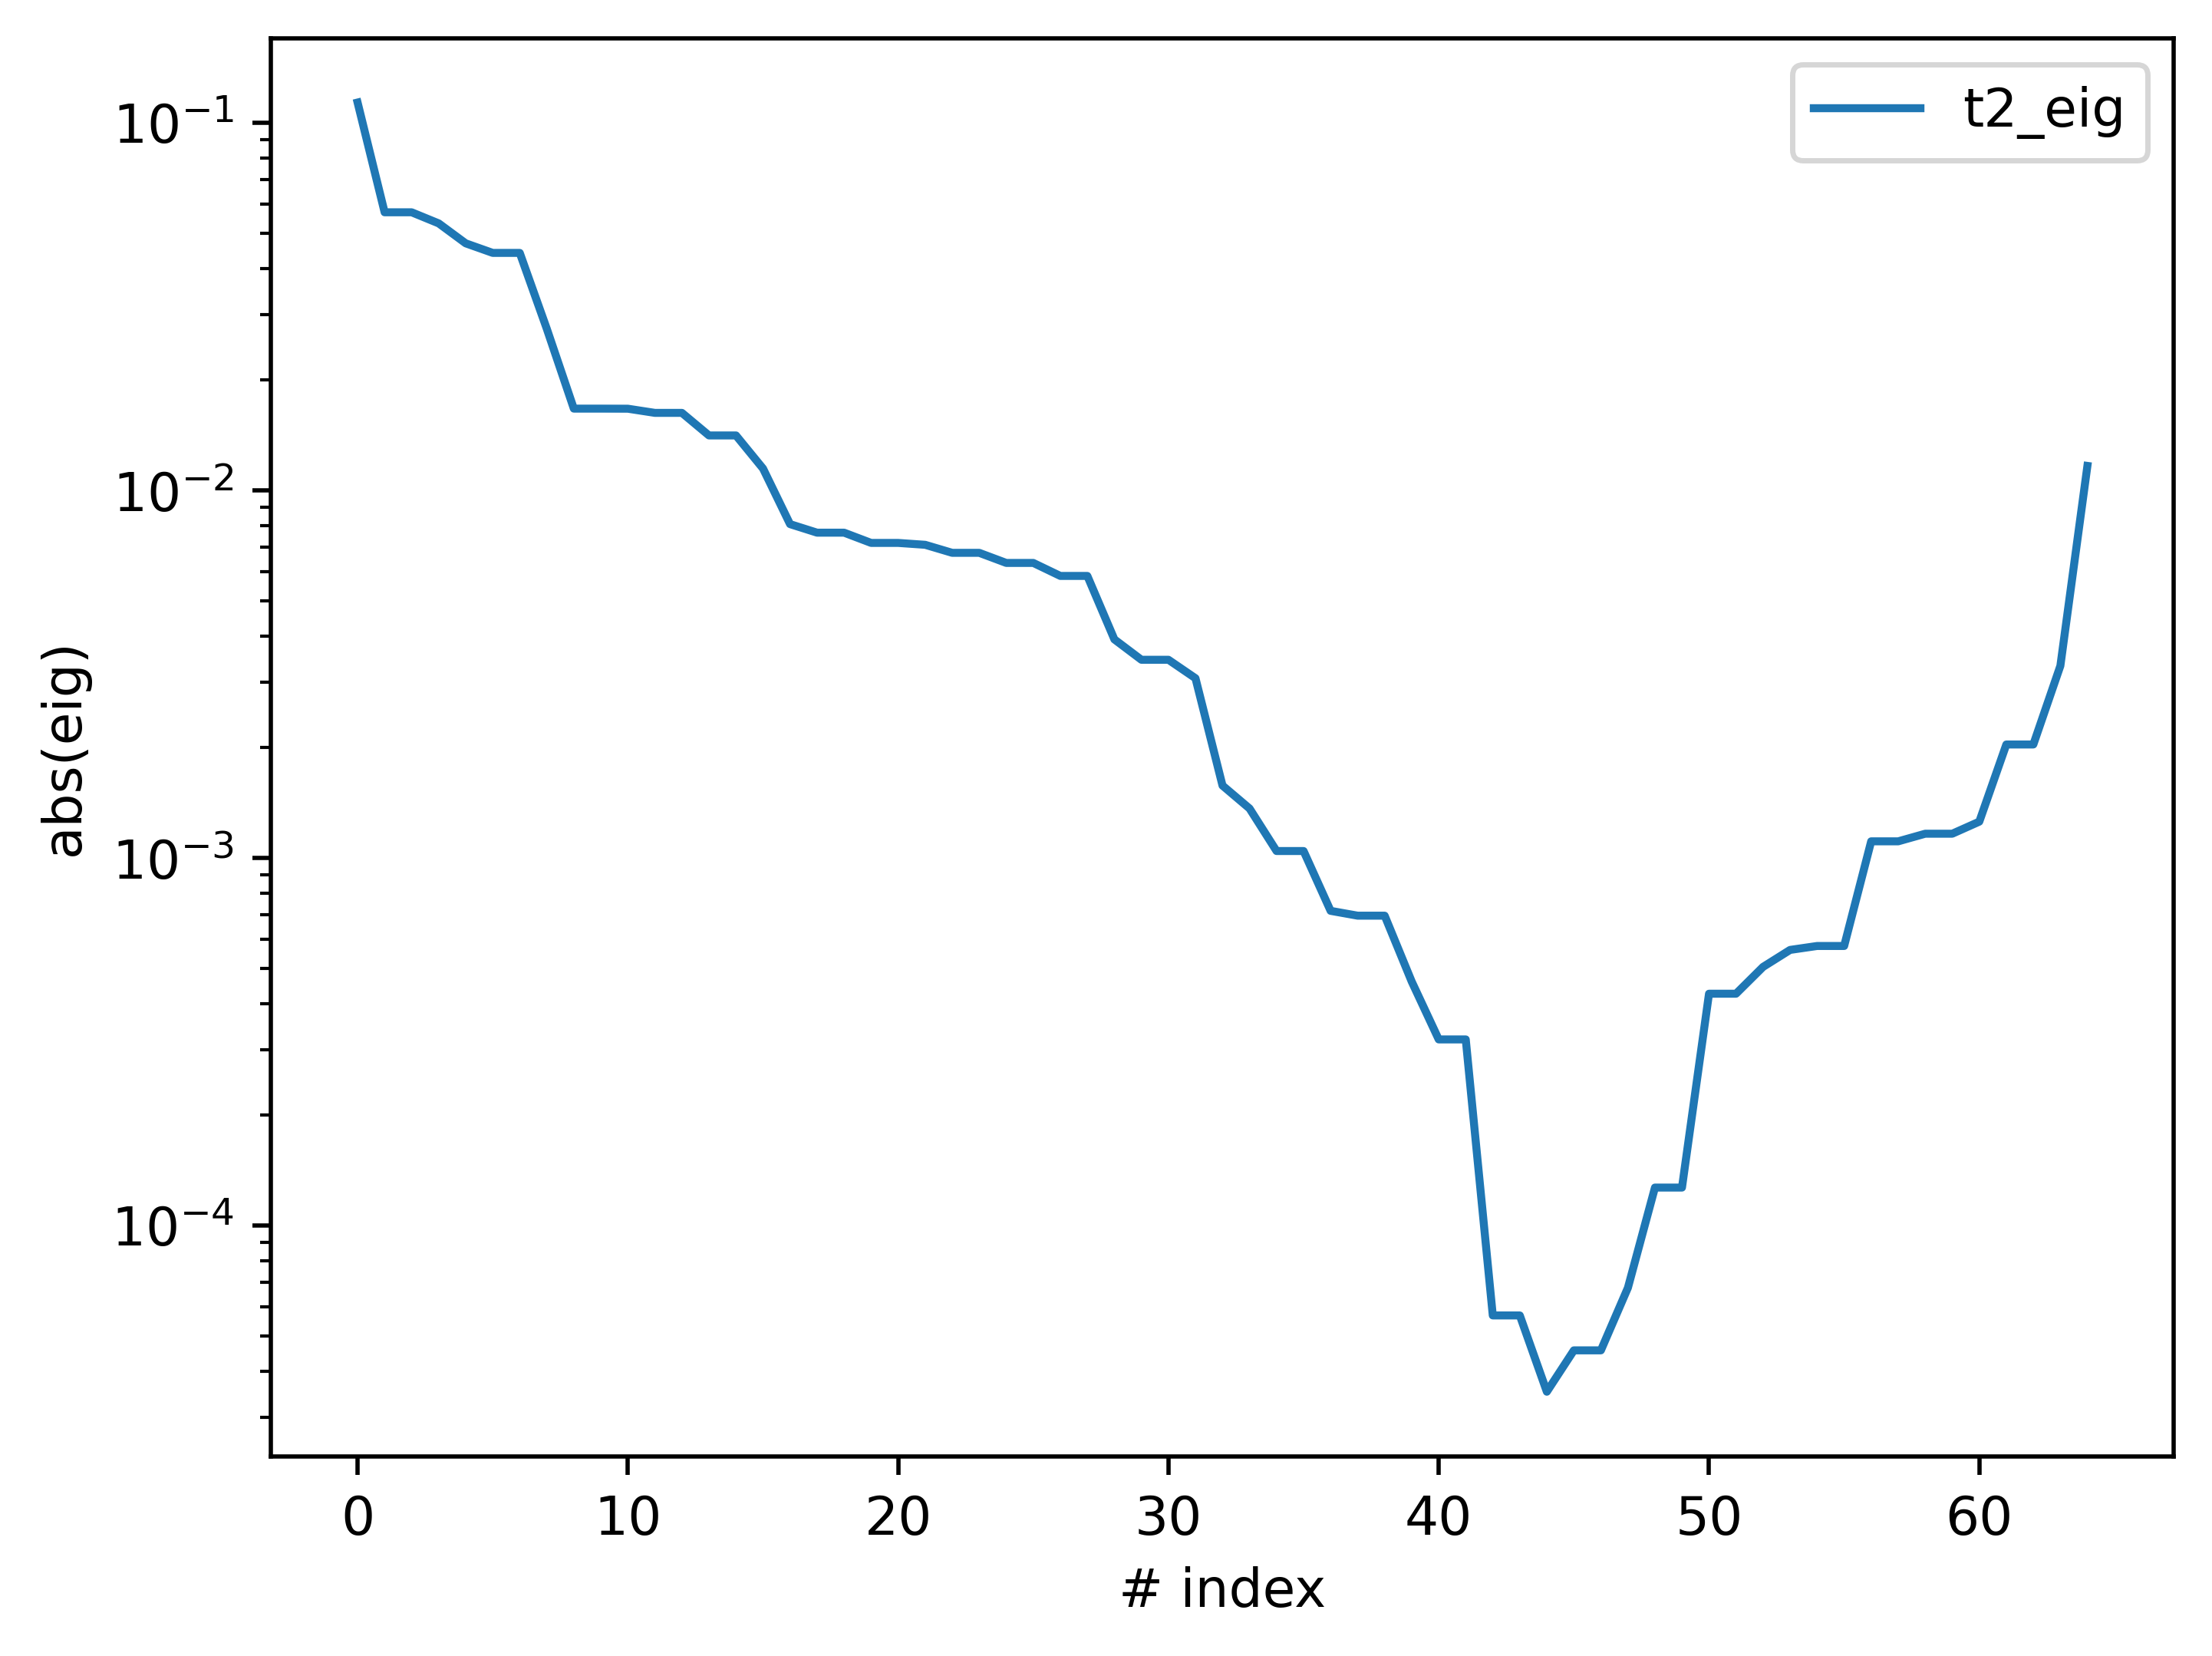

In [36]:
# import matplotlib.pyplot as plt
# fig=plt.gcf()
# fig.dpi=500
# plt.yscale("log")
# plt.plot(np.abs(eigen_init),label="initial")
# plt.plot(np.abs(eigen_final),label="final")
# plt.xlabel("# index")
# plt.ylabel("abs(eig)")
# plt.legend()
# fig.savefig("abs.png")
import matplotlib.pyplot as plt
fig=plt.gcf()
fig.dpi=500
plt.yscale("log")
plt.plot(np.abs(eigen_final),label="t2_eig")
plt.xlabel("# index")
plt.ylabel("abs(eig)")
plt.legend()
fig.savefig("t2_abs.png")

In [17]:
eigen_final[np.where(eigen_final<0)]

array([-9.04729554e-03, -9.04729554e-03, -8.41383265e-03, -6.69638485e-03,
       -6.33247095e-03, -6.33247095e-03, -4.00649023e-03, -4.00649023e-03,
       -3.65858350e-03, -3.65858350e-03, -3.29015709e-03, -3.29015709e-03,
       -3.14912849e-03, -2.93328209e-03, -2.93328209e-03, -2.03681916e-03,
       -2.03681916e-03, -1.88317465e-03, -1.88317465e-03, -1.58712569e-03,
       -1.58712569e-03, -1.56825523e-03, -1.50049406e-03, -1.15942843e-03,
       -1.15942843e-03, -1.11815940e-03, -1.01580296e-03, -1.01580296e-03,
       -8.94627415e-04, -8.94627415e-04, -8.61372782e-04, -8.61372782e-04,
       -7.90514717e-04, -6.91355178e-04, -6.43243712e-04, -6.15885885e-04,
       -6.15885885e-04, -5.68398095e-04, -4.79862806e-04, -4.79862806e-04,
       -4.52590506e-04, -4.52590506e-04, -4.47748407e-04, -4.47748407e-04,
       -3.55090943e-04, -3.55090943e-04, -3.55059310e-04, -2.92771252e-04,
       -2.69475746e-04, -2.69475746e-04, -2.59507753e-04, -2.33949968e-04,
       -2.33949968e-04, -

In [16]:
eigen_init[np.where(eigen_init<0)]

array([-7.00768110e-16, -3.87847996e-17, -2.84337320e-17, -2.57995844e-17,
       -2.22309644e-17, -2.19020977e-17, -2.07738755e-17, -1.77644604e-17,
       -1.64290293e-17, -1.59516574e-17, -1.49791549e-17, -1.39495660e-17,
       -1.27774548e-17, -1.24480971e-17, -1.14351944e-17, -1.13655422e-17,
       -9.72298560e-18, -9.29062660e-18, -8.52265225e-18, -8.26211317e-18,
       -7.81302905e-18, -7.19525056e-18, -5.86541347e-18, -5.59553386e-18,
       -4.89698294e-18, -4.85489779e-18, -4.33411233e-18, -4.10774521e-18,
       -3.48703918e-18, -3.48080867e-18, -3.16770378e-18, -2.96195635e-18,
       -2.43925087e-18, -1.77130833e-18, -1.30707363e-18, -1.29298277e-18,
       -7.29261807e-19, -6.00817087e-19, -4.06645338e-20, -1.14701250e-20])